# Convolutional Neural Network Denoising for Computed Tomography Denoising
---

Application of deep convolutional neural networks (CNNs) for reducing noise in computed tomography (CT) images.

In [ ]:
import tensorflow as tf

from tensorflow import keras
from scipy import ndimage, misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import time
import os

## Loading Data

CT dataset - Each training example consists of a pair of images: the input, which is a simulated 25% dose CT image, and the target, which is the corresponding routine dose CT image.

![alt text](https://drive.google.com/uc?id=1dBzBOk1ZejqZ8as9cioyXB--8X0z0SST)



In [ ]:
# Load data for courework
if not os.path.exists('./BE41003_Coursework'):
  !git clone https://github.com/alperelli/BE41003_Coursework.git

Cloning into 'BE41003_Coursework'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0
Receiving objects: 100% (4/4), 37.31 MiB | 25.66 MiB/s, done.


In [ ]:
if not os.path.exists('./CW1_Question_4_data'):
    !cp BE41003_Coursework/CW1_Question_4_data.tgz ./
    !tar -xzvf CW1_Question_4_data.tgz
    assert os.path.exists('./data')

# Load the training data array, which is used to update CNN weights
# This arraay contains 8000 30x30 CT image patches
train_input = np.load('./data/train_input.npy')
train_target = np.load('./data/train_target.npy')
train_target.shape

# Load the validation data array, which is used to monitor for overfitting
# This array contains 1000 30x30 image patches
val_input = np.load('./data/val_input.npy')
val_target = np.load('./data/val_target.npy')

# Load the testing data, which is used to validate the model performance
# This array contains 5 512x512 images
test_input = np.load('./data/test_input.npy')
test_target = np.load('./data/test_target.npy')

# Load some examples images from a more advanced denoising CNN for comparison
test_example = np.load('./data/test_input_denoised.npy')

print('Data loading completed.')

./data/
./data/test_input.npy
./data/test_input_denoised.npy
./data/test_target.npy
./data/test_target_denoised.npy
./data/train_input.npy
./data/train_target.npy
./data/val_input.npy
./data/val_target.npy
Data loading completed.


In [ ]:
# This is a helper function that plots images using typical CT windows
def ctshow(img):

  # specific window settings here
  ww = 400
  wl = 40

  # Plot image on clean axes with specified window level
  vmin = wl - ww // 2
  vmax = wl + ww // 2
  plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
  plt.xticks([])
  plt.yticks([])

  return

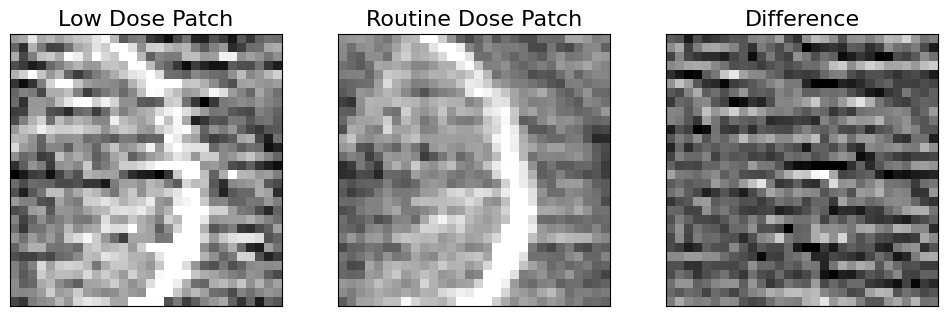

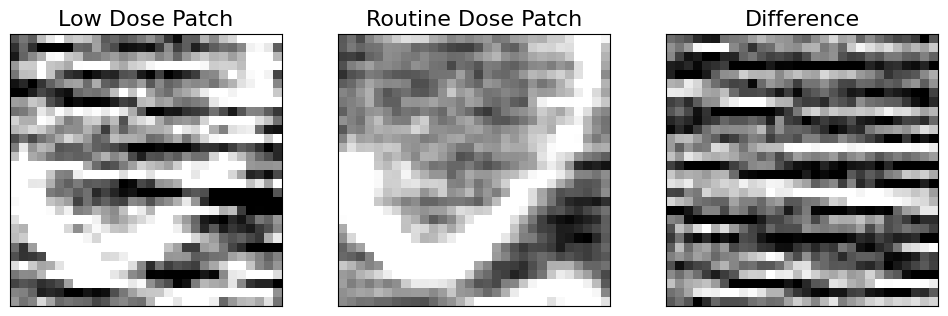

In [ ]:
# Get a few examples of training patches
image_examples = [3, 16, 36]

for row in range(2):

  plt.figure(figsize=(12, 12))
  nexample = image_examples[row]

  # Simulated low-dose example
  plt.subplot(3, 3, 1+row*3)
  plt.title('Low Dose Patch', fontsize=16)
  ctshow(train_input[nexample, :, :, 0])

  # Simulated routine-dose example
  plt.subplot(3, 3, 2+row*3)
  plt.title('Routine Dose Patch', fontsize=16)
  ctshow(train_target[nexample, :, :, 0])
  plt.subplot(3, 3, 3+row*3)

  # Difference between low-dose and routine-dose to visualize CT noise
  plt.title('Difference', fontsize=16)
  ctshow(train_target[nexample, :, :, 0] - train_input[nexample, :, :, 0])

## Building Keras model:

TODO: implement using Keras/Tensorflow the model for CNN denoising containing convolutional layers and ReLU activation layers as in the picture. Each layer operates on the output of the previous layer. You can decide the following parameters: number of filters, stride, kernel size.

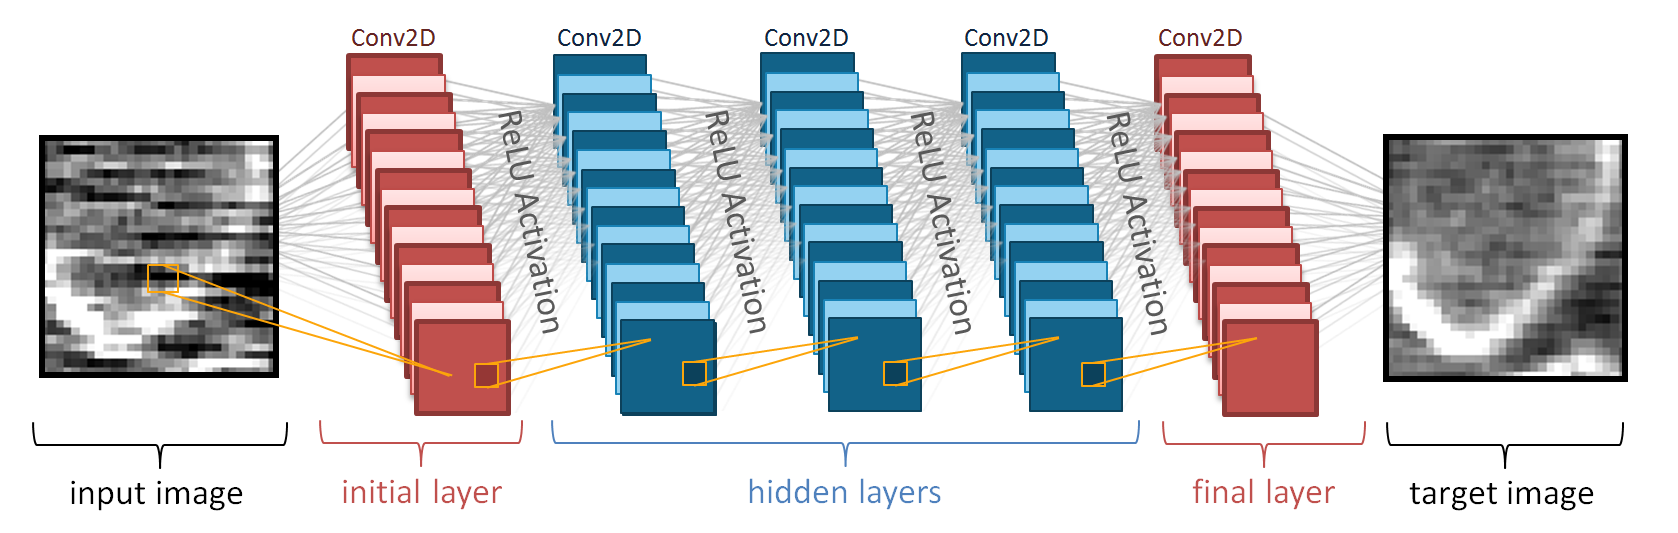



In [ ]:
# Specifies the number of convolutonal layers in the model
# YOUR CODE HERE

# Specifies the number of convolutional filters in each convolutional layer
# YOUR CODE HERE

# Specifies the size of the filter in each convolutional layer
# YOUR CODE HERE

# Specifies the number of pixels the filter translates at each step
# YOUR CODE HERE

# Specifies the non-linear function applied after each convolutionaly layer
activation = 'relu'

# This function builds the model according to the parameters set above
def build_model():

    # The input tensor image can have arbitrary spatial extent, but just
    # one channel for the grayscale CT images
    # YOUR CODE HERE

    # We define a preprocessing layer to rescale the CT image pixel values
    # (normalization)
    # YOUR CODE HERE

    # Adds each convolutional layer
    # YOUR CODE HERE

    # Final layer has just one feature map corresponding to the output image
    # YOUR CODE HERE

    # Here we rescale the output to typical CT number range
    # YOUR CODE HERE

    # Define the model by specifying the inputand output tensors
    # YOUR CODE HERE
    return model

denoising_model = build_model()
denoising_model.summary()

## Optimization: Training the network

The CNN parameters will be optimized by minimizing the mean-squared-error (MSE) difference between the CNN output images and the low-noise target images.

We need to train the model based on the datasets that was previously loaded. When running on Google Colab, you will want to utilize a GPU for this optimization procedure. Click **Runtime** above, then **Change Runtime Type** in the drop down menu, finally select **GPU** under hardware accelerator. (It should take the GPU under three minutes to train the model with default parameters.)

In [ ]:
# Sets the number of iterations through the training data
# YOUR CODE HERE

# Sets the number of images patches used to calcualte a single parameter update
# YOUR CODE HERE

# Learning rate
# YOUR CODE HERE

# Implement the optimizer using Keras function
# YOUR CODE HERE


# As the training progresses, we'll monitor network output and performance
# metrics
progress_example = 2
buffer = 128
progress_ims = []

def train(loss_function, model):

    # Compile the model
    # YOUR CODE HERE

    # As the training progresses, we'll monitor network output and performance
    # metrics. Some related variables are initialized here
    example_input = test_input[[3], ...]
    edge_buffer = 128
    progress_ims = []
    progress_val = []

    for epoch in range(epochs):

      # Evaluate model
      val_loss = # YOUR CODE HERE
      # Predict model
      example_output = # YOUR CODE HERE

      example_img = example_output[0, edge_buffer:-edge_buffer,
                                edge_buffer:-edge_buffer, 0]
      progress_ims.append(example_img)
      progress_val.append(val_loss)

      # Update model weights using training data
      istart = 0
      while istart < (len(train_input) - batch_size):
          x = train_input[istart:istart + batch_size]
          y = train_target[istart:istart + batch_size]
          model.train_on_batch(x=x, y=y)
          istart += batch_size

    progress_ims = np.stack(progress_ims, axis=0)

    print('Training phase complete.')
    return model, progress_ims, progress_val


# TODO: run the training function to obtain the trained model and performance at
# intermediate steps
# YOUR CODE HERE


In [ ]:
# Here we show some example images from different epochs in the training

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.title('Before Optimization', fontsize=16)
ctshow(progress_ims[0, :, :])

plt.subplot(2, 2, 2)
plt.title('Epoch %d/%d' %(1, epochs), fontsize=16)
ctshow(progress_ims[1, :, :])

plt.subplot(2, 2, 3)
plt.title('Epoch %d/%d' %(5, epochs), fontsize=16)
ctshow(progress_ims[5, :, :])

plt.subplot(2, 2, 4)
plt.title('Final Epoch', fontsize=16)
ctshow(progress_ims[-1, :, :])

### Inference: Testing the network

You should apply the CNN in inference mode to the reserved testing data to check the performance. (Since all CNN parameters are fixed at this point, the processing time for this phase is typically very fast.)





In [ ]:
# Display an example input image, the denoised image, and the difference
nexample = 1

# Predict
CNNout = # YOUR CODE HERE

plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.title('Low Dose Input', fontsize=16)
ctshow(test_input[nexample, :, :, 0])

plt.subplot(1, 3, 2)
plt.title('Estimated Noise Map', fontsize=16)
ctshow(test_input[nexample, :, :, 0] - CNNout[nexample, :, :, 0])

plt.subplot(1, 3, 3)
plt.title('CNN Denoised Image', fontsize=16)
ctshow(CNNout[nexample, :, :, 0])

# Same as above, but with a different field of view
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title('CNN Denoised, MSE', fontsize=16)
ctshow(CNNout[3, 110:-110, 50:-50, 0])



How do you comment the result obtained?

Comments: